### This file plots the processed csv files with matplotlib

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [24]:
date = '2018-12-07_09h02'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/' + date + '/'

## Throughput plot for read loads

In [17]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'two_mws_mem_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,6,8,3136.938889,4.418151,2922.669217,13.662682
1,6,16,3119.722222,37.150550,2928.027778,0.680051
2,6,32,3100.165938,17.477727,2928.616667,1.284595
3,6,64,3155.172222,41.158547,2930.747723,1.515618
4,24,8,8304.392303,12.031670,2936.012295,1.550509
5,24,16,8542.200000,6.088301,2936.618397,3.955394
6,24,32,8382.555556,75.728727,2936.656922,1.936573
7,24,64,8297.536339,56.576539,2938.228415,3.614798
8,48,8,9378.896175,66.982831,2930.865301,2.122875
9,48,16,10302.693534,79.930661,2928.806648,0.401102


In [18]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

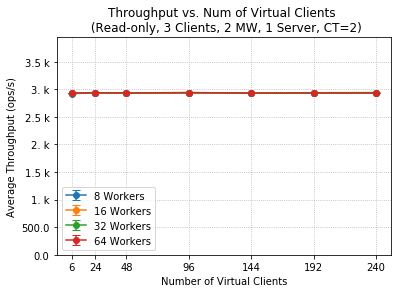

In [26]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e3+np.max(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_tp_read.png", dpi = 150)


## Throughput plot for write loads

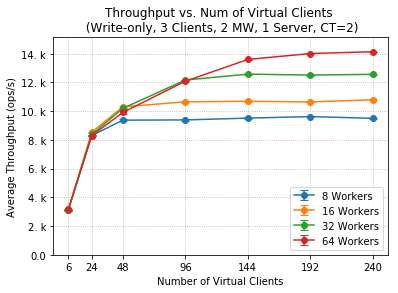

In [27]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_tp_read_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_read_cut['client']
    tps = df_tp_read_cut['write_tp_mean']
    std = df_tp_read_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e3+np.max(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [21]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'two_mws_mem_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,6,8,1.911028,0.002493,2.057120,0.030813
1,6,16,1.923472,0.024213,2.038917,0.000828
2,6,32,1.999596,0.042163,2.038056,0.001047
3,6,64,2.014657,0.181080,2.036978,0.001305
4,24,8,2.948939,0.019353,8.154675,0.004248
5,24,16,2.844324,0.030511,8.245728,0.139564
6,24,32,2.894370,0.045726,8.154711,0.005199
7,24,64,2.908461,0.020907,8.147488,0.010447
8,48,8,5.159029,0.054755,16.391150,0.055830
9,48,16,4.661372,0.036983,16.516346,0.173002


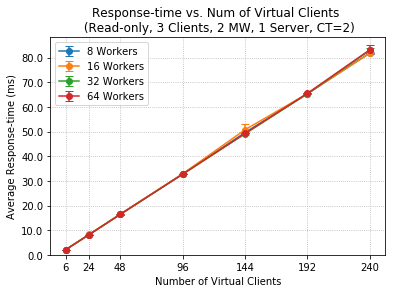

In [28]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_rt_read.png", dpi = 150)


## Response-time plot for write loads

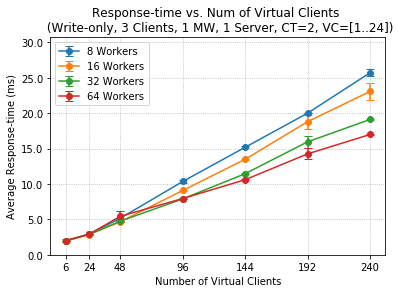

In [23]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_mem_rt_write.png", dpi = 150)
